In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
crime_hc = pd.read_csv('crime_data.csv')

In [3]:
crime_hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime_hc.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime_hc2 = crime_hc.drop(['Unnamed: 0'],axis=1)
crime_hc2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
#Normalization Function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)
#Normalized data frame (considering the numerical part of the data)
crime_hc_norm= norm_func(crime_hc2.iloc[:,1:])

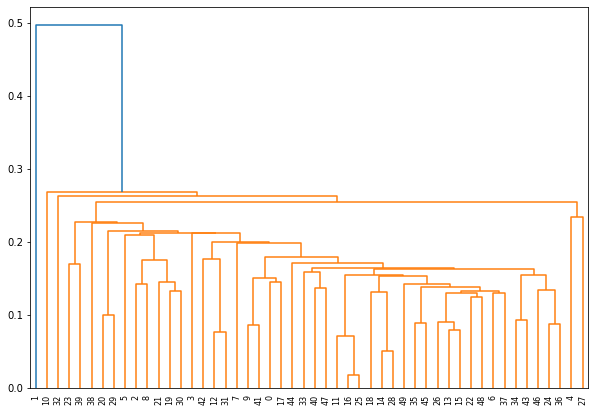

In [7]:
#Create dendogram
plt.figure(figsize=(10,7))
dendrogram=sch.dendrogram(sch.linkage(crime_hc_norm,method='single'))

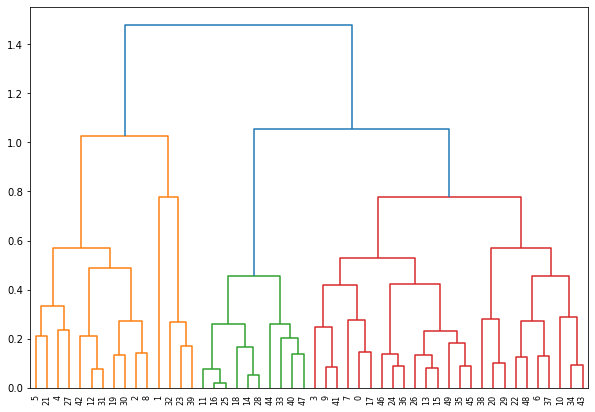

In [8]:
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(crime_hc_norm, method='complete'))

In [9]:
#Create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=3)

In [10]:
y=pd.DataFrame(hc.fit_predict(crime_hc_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    48
1     1
2     1
Name: clustersid, dtype: int64

In [11]:
#Adding clusters to dataset
crime_hc_norm['clustersid']=hc.labels_
crime_hc_norm

,Assault,UrbanPop,Rape,clustersid
0,0.654110,0.440678,0.359173,0
1,0.746575,0.271186,0.961240,1
2,0.852740,0.813559,0.612403,0
3,0.496575,0.305085,0.315245,0
4,0.791096,1.000000,0.860465,0
5,0.544521,0.779661,0.811370,0
6,0.222603,0.762712,0.098191,0
7,0.660959,0.677966,0.219638,0
8,0.993151,0.813559,0.635659,0
9,0.568493,0.474576,0.478036,0


## K-Means Model ##

In [12]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.preprocessing import StandardScaler

In [13]:
crime_k = pd.read_csv('crime_data.csv')

In [14]:
crime_k1=crime_k.drop(['Unnamed: 0'], axis=1)
crime_k1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [17]:
# Normalization function 
crime_k_norm=StandardScaler().fit_transform(crime_k1)

## Elbow chart ##

C:\Users\HRITHIK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


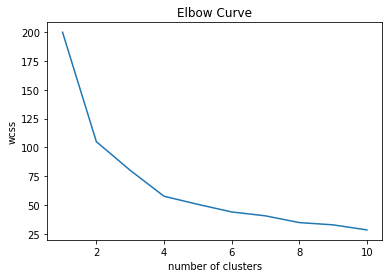

In [18]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(crime_k_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [19]:
#Using K=4
Clu=KMeans(4,random_state=30).fit(crime_k_norm)
Clu

KMeans(n_clusters=4, random_state=30)

In [20]:
Clu.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [22]:
#Appending cluster to the data set
crime_k2=crime_k1.copy()
crime_k2['Clusters'] = Clu.labels_
crime_k2

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [23]:
#Group the data by 4 clusters( K=4)
crime_k2.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


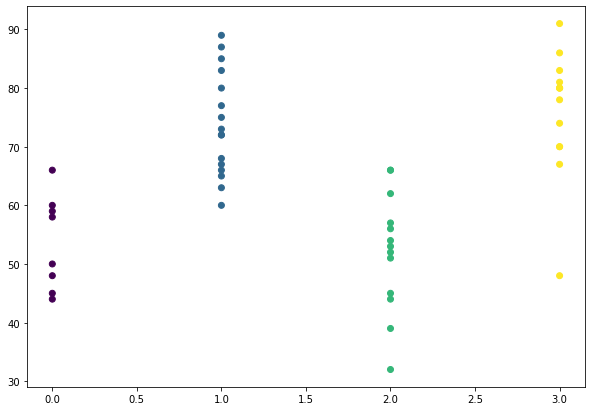

In [24]:
#Plot the Clusters
plt.figure(figsize=(10,7))
plt.scatter(crime_k2['Clusters'], crime_k2['UrbanPop'], c= Clu.labels_)

## DBSCAN Model ##

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing  import StandardScaler

In [27]:
crime_db = pd.read_csv("crime_data.csv")

In [28]:
crime_db.drop(['Unnamed: 0'], axis=1, inplace=True)

In [29]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_db_norm=StandardScaler().fit_transform(crime_db)
crime_db_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [30]:
#DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_db_norm)

DBSCAN(eps=1, min_samples=4)

In [31]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [32]:
#Adding clusters to dataset
crime_db['clusters']=dbscan.labels_
crime_db

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [33]:
crime_db.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


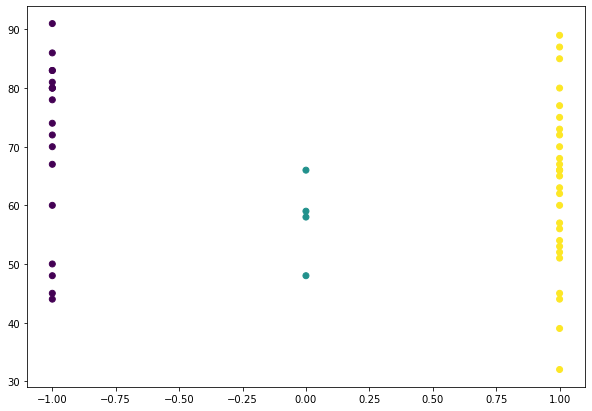

In [34]:
#Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime_db['clusters'],crime_db['UrbanPop'], c=dbscan.labels_)